In [5]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [27]:
# write your code for task 0 here
people = pd.read_csv("../data/adult.csv", index_col=0)
print(people.head())

   age         workclass  education      marital-status         occupation  \
0   39         State-gov  Bachelors       Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2   38           Private    HS-grad            Divorced  Handlers-cleaners   
3   53           Private       11th  Married-civ-spouse  Handlers-cleaners   
4   28           Private  Bachelors  Married-civ-spouse     Prof-specialty   

    relationship   race     sex  hours-per-week native-country salary  \
0  Not-in-family  White    Male              40  United-States  <=50K   
1        Husband  White    Male              13  United-States  <=50K   
2  Not-in-family  White    Male              40  United-States  <=50K   
3        Husband  Black    Male              40  United-States  <=50K   
4           Wife  Black  Female              40           Cuba  <=50K   

   salary K$  
0         39  
1         35  
2         27  
3         43  
4         25  


In [28]:
print(people.info())
print(people.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  32561 non-null  object
 10  salary          32561 non-null  object
 11  salary K$       32561 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 3.2+ MB
None
age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
salary            0
salar

In [32]:
people.replace("?", np.nan, inplace=True)
print(people)

       age         workclass   education      marital-status  \
0       39         State-gov   Bachelors       Never-married   
1       50  Self-emp-not-inc   Bachelors  Married-civ-spouse   
2       38           Private     HS-grad            Divorced   
3       53           Private        11th  Married-civ-spouse   
4       28           Private   Bachelors  Married-civ-spouse   
...    ...               ...         ...                 ...   
32556   27           Private  Assoc-acdm  Married-civ-spouse   
32557   40           Private     HS-grad  Married-civ-spouse   
32558   58           Private     HS-grad             Widowed   
32559   22           Private     HS-grad       Never-married   
32560   52      Self-emp-inc     HS-grad  Married-civ-spouse   

              occupation   relationship   race     sex  hours-per-week  \
0           Adm-clerical  Not-in-family  White    Male              40   
1        Exec-managerial        Husband  White    Male              13   
2      Ha

In [33]:
print(people.isnull().sum())

age                  0
workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     583
salary               0
salary K$            0
dtype: int64


In [34]:
people.describe()

,age,hours-per-week,salary K$
count,32561.000000,32561.000000,32561.000000
mean,38.581647,40.437456,72.674611
std,13.640433,12.347429,84.345976
min,17.000000,1.000000,15.000000
25%,28.000000,40.000000,26.000000
50%,37.000000,40.000000,38.000000
75%,48.000000,45.000000,49.000000
max,90.000000,99.000000,349.000000


In [36]:
people.dropna(inplace=True)

In [37]:
print(people.isnull().sum())

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
salary            0
salary K$         0
dtype: int64


In [39]:
print(people['salary'].value_counts())
print(people['salary K$'].value_counts())

salary
<=50K    22654
>50K      7508
Name: count, dtype: int64
salary K$
25     687
46     681
38     681
16     678
22     677
      ... 
153     15
183     15
94      15
294     14
207     13
Name: count, Length: 334, dtype: int64


# Task 1
Print the count of men and women in the dataset.

In [40]:
# write your code for task 1 here
print(people['sex'].value_counts())

sex
Male      20380
Female     9782
Name: count, dtype: int64


# Task 2
Find the average age of men in dataset

In [42]:
# write your code for task 2 here
men = people[people['sex'] == 'Male']
average_age_men = men['age'].mean()
print(average_age_men)

39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [43]:
# write your code for task 3 here
poland_count = people[people['native-country'] == 'Poland'].shape[0]
total_count = people.shape[0]
percentage_poland = (poland_count / total_count) * 100
print(percentage_poland)

0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [47]:
# write your code for task 4 here
high_income = people[people['salary K$'] > 50]
low_income = people[people['salary K$'] <= 50]

mean_age_high_income = high_income['age'].mean()
std_age_high_income = high_income['age'].std()

mean_age_low_income = low_income['age'].mean()
std_age_low_income = low_income['age'].std()

print(mean_age_high_income, std_age_high_income, mean_age_low_income, std_age_low_income)

43.95911028236548 10.269632835673852 36.60806038668668 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [49]:
# write your code for task 5 here
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
high_salary_people = people[people['salary K$'] > 50]
no_higher_education = high_salary_people[~high_salary_people['education'].isin(higher_education)]

print(no_higher_education)

       age         workclass     education      marital-status  \
7       52  Self-emp-not-inc       HS-grad  Married-civ-spouse   
10      37           Private  Some-college  Married-civ-spouse   
55      43           Private  Some-college  Married-civ-spouse   
67      53           Private       HS-grad  Married-civ-spouse   
68      49      Self-emp-inc  Some-college  Married-civ-spouse   
...    ...               ...           ...                 ...   
32462   48      Self-emp-inc       HS-grad  Married-civ-spouse   
32518   57         Local-gov       HS-grad  Married-civ-spouse   
32519   46           Private  Some-college  Married-civ-spouse   
32557   40           Private       HS-grad  Married-civ-spouse   
32560   52      Self-emp-inc       HS-grad  Married-civ-spouse   

              occupation relationship   race     sex  hours-per-week  \
7        Exec-managerial      Husband  White    Male              45   
10       Exec-managerial      Husband  Black    Male           

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [50]:
# write your code for task 6 here
education_age_stats = people.groupby('education')['age'].describe()
print(education_age_stats)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [52]:
# write your code for task 7 here
men = people[people['sex'] == 'Male']
married_men = men[men['marital-status'].str.startswith('Married')]
non_married_men = men[~men['marital-status'].str.startswith('Married')]
married_men_salary_mean = married_men['salary K$'].astype(float).mean()
non_married_men_salary_mean = non_married_men['salary K$'].astype(float).mean()

print(married_men_salary_mean, non_married_men_salary_mean)

107.49455968688845 46.59723865877712


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [54]:
# write your code for task 8 here
max_hours_per_week = people['hours-per-week'].max()
count_people_max_hours = people[people['hours-per-week'] == max_hours_per_week].shape[0]

print(count_people_max_hours)

78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

                     age  hours-per-week  salary K$
age             1.000000        0.101599   0.208203
hours-per-week  0.101599        1.000000   0.196378
salary K$       0.208203        0.196378   1.000000


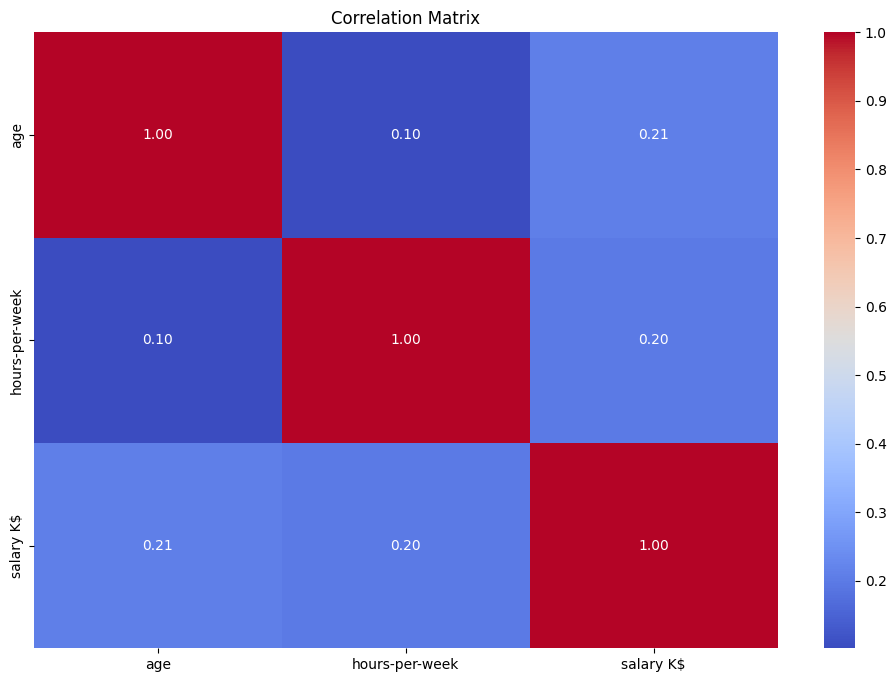

The highest correlations:
salary K$       age               0.208203
age             salary K$         0.208203
hours-per-week  salary K$         0.196378
salary K$       hours-per-week    0.196378
hours-per-week  age               0.101599
dtype: float64


In [61]:
# write your code for task 9 here
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = people.corr(numeric_only=True)
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1]
print("The highest correlations:")
print(max_corr.head())
